# Trabalho Final de Métodos Quantitativos
###### Pedro Henrique Ventura 
###### Aluno de Sistemas Multimídia da Pós Graduação em Ciência da Computação (2019). Terceiro Trimestre
## Bibliotecas

In [1]:
import scipy 
import math
import pylab
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.colors as mcolors

from sklearn.linear_model import LinearRegression

# Importação dos dados

### Uma primeira vizualização

In [2]:
# Vendo os atributos e seus respectivos tipos
df = pd.read_csv("googleplaystore.csv")
print("Instâncias e Classes: ",df.shape)
df.info()

Instâncias e Classes:  (10841, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
# uma primeira exibição
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#algumas amostras estatísticas
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


As 10 categorias mais significativas:
 FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: Category, dtype: int64
10841


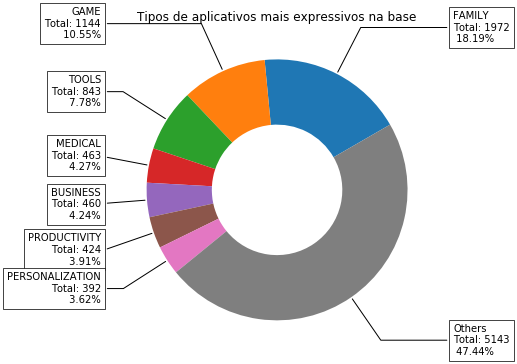

In [5]:
# plotando expressividade das classes de aplicativo

category = df.Category.value_counts()
print("As 10 categorias mais significativas:\n",category.head(10))
categoryName = df.Category.value_counts(sort = True).index
categoryValues = df.Category.value_counts(sort = True).values
totalC = np.sum(categoryValues)
totalOthers =  np.sum(categoryValues)- (categoryValues[0] + categoryValues[1] + categoryValues[2] +
                                 categoryValues[3]+categoryValues[4]+categoryValues[5]+categoryValues[6])
print(totalC)

# carregando os campos
labels = [categoryName[0]+"\nTotal: "+str(categoryValues[0])+"\n %.2f"%((categoryValues[0]/totalC)*100)+"%",
          categoryName[1]+"\nTotal: "+str(categoryValues[1])+"\n %.2f"%((categoryValues[1]/totalC)*100)+"%",
          categoryName[2]+"\nTotal: "+str(categoryValues[2])+"\n %.2f"%((categoryValues[2]/totalC)*100)+"%",
          categoryName[3]+"\nTotal: "+str(categoryValues[3])+"\n %.2f"%((categoryValues[3]/totalC)*100)+"%",
          categoryName[4]+"\nTotal: "+str(categoryValues[4])+"\n %.2f"%((categoryValues[4]/totalC)*100)+"%",
          categoryName[5]+"\nTotal: "+str(categoryValues[5])+"\n %.2f"%((categoryValues[5]/totalC)*100)+"%",
          categoryName[6]+"\nTotal: "+str(categoryValues[6])+"\n %.2f"%((categoryValues[6]/totalC)*100)+"%",
          "Others"+"\nTotal: "+str(totalOthers)+"\n %.2f"%((totalOthers/totalC)*100)+"%"]
data =  [categoryValues[0],categoryValues[1],categoryValues[2],categoryValues[3],categoryValues[4],categoryValues[5],categoryValues[6],totalOthers]

# Configurando o tamanho do gráfico
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=30)

bbox_props = dict(boxstyle="square,pad=0.4", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Tipos de aplicativos mais expressivos na base")

plt.show()

In [6]:
## análise de dados faltantes
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Tratamento da base
### Como pode ser visto, grande parte dos dados não estão como valores reais e possui alguns valores faltantes. Logo, precisamos fazer um tratamento para uma análise mais aprofundada.
#### Removendo dados faltantes

In [7]:
df.dropna(inplace = True)
tamanhoBase=df.shape[0]
print(df.isna().sum())
print("Instâncias e Classes pós remoção: ",df.shape)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64
Instâncias e Classes pós remoção:  (9360, 13)


## Transformando "Size, Price e Installs, Reviews" em valores reais
#### Os valores foram transformados de string para float, removendo $, convertendo M para 1 e K para 0.001 (deixando em Mb) e removendo o +
Alem disso e claro, na variavel "Size", removemos "Varies With device" por nulo.

In [8]:
df['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [9]:
df.Size = (df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             df.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [0.001, 1]).astype(int))

df.Price.replace(regex=True,inplace=True,to_replace=(r'\$',r' '),value=r'')

df.Installs.replace(regex=True,inplace=True,to_replace=(r'\+',r',',r' '),value=r'')

df.Price = df.Price.astype(float)
df.Size = df.Size.astype(float)
df.Installs = df.Installs.astype(float)
df.Reviews = df.Reviews.astype(float)

# Revendo a Base (pós tratamento)

In [10]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9360.000000,9.360000e+03,7723.00000,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,37.30707,1.790875e+07,0.961279
std,0.515263,3.145023e+06,93.54223,9.126637e+07,15.821640
min,1.000000,1.000000e+00,1.00000,1.000000e+00,0.000000
25%,4.000000,1.867500e+02,6.10000,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,16.00000,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,37.00000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,994.00000,1.000000e+09,400.000000


### Rating

As 5 Notas mais Significativas: 
 4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
Name: Rating, dtype: int64 



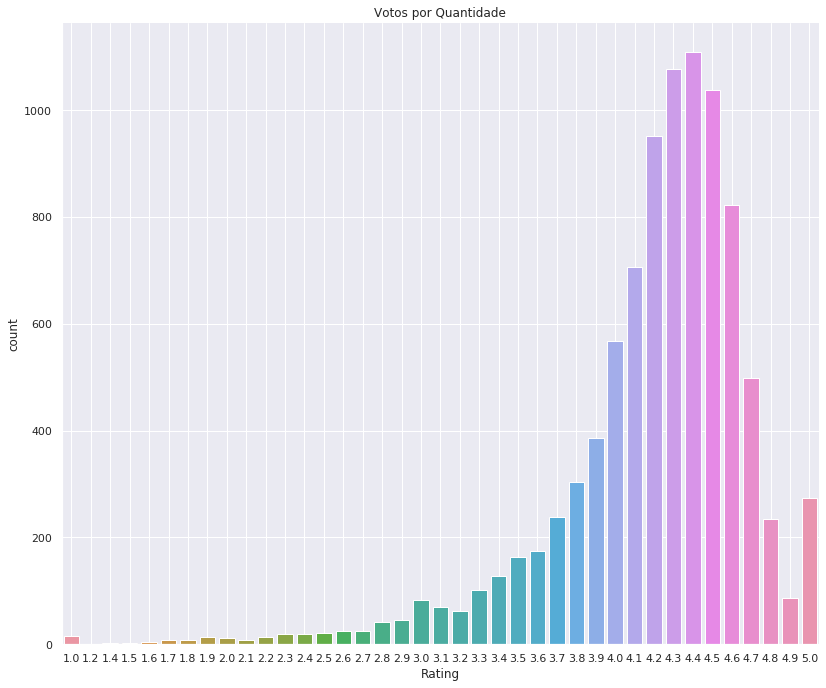

In [11]:
rating = df.Rating.value_counts()#.sort_index()
print("As 5 Notas mais Significativas: \n",rating.head(),"\n")
sns.set(style="darkgrid")
sns.catplot(x="Rating",data = df,kind="count",height=9.5, aspect=1.2)
plt.title("Votos por Quantidade")
plt.grid(True)

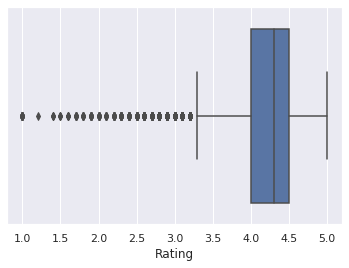

In [12]:
ax = sns.boxplot(x=df["Rating"])

### Size

Os 5 valores mais comuns de tamanho de um app: 
 14.0    166
12.0    161
15.0    159
11.0    159
13.0    157
Name: Size, dtype: int64


[]

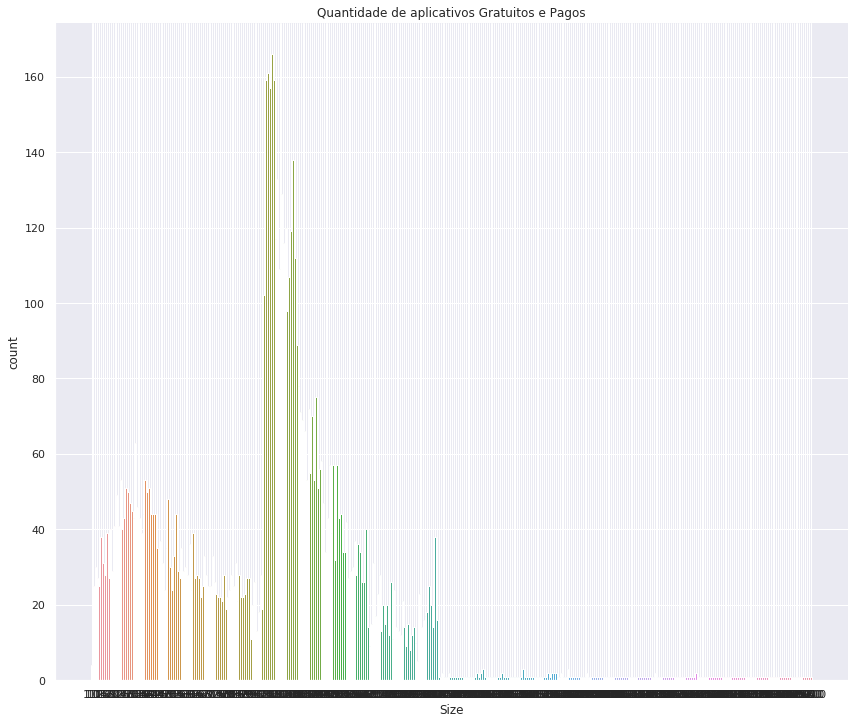

In [13]:
size = df.Size.value_counts()#.sort_index()
print("Os 5 valores mais comuns de tamanho de um app: \n",size.head())
sns.set(style="darkgrid")
sns.catplot(x="Size",data = df,kind="count",height=10, aspect=1.2)
plt.title("Tamanho dos apps")
plt.grid(True)
plt.plot()


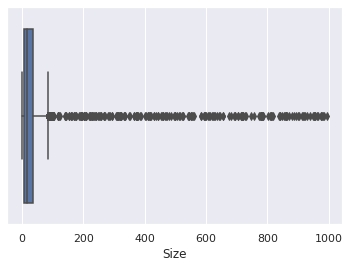

In [14]:
ax = sns.boxplot(x=df["Size"])

### Price

Porcentagem de aplicativos gratuitos 0.0    93.108974
Name: Price, dtype: float64
Os 5 Precos mais Significativas: 
 0.00    8715
2.99     114
0.99     106
4.99      70
1.99      59
Name: Price, dtype: int64


[]

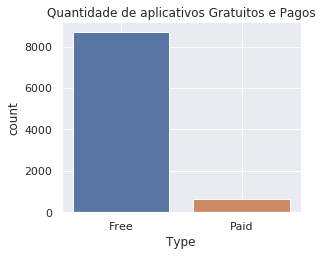

In [15]:
price_Percent = df.Price.value_counts(normalize=True) * 100
price = df.Price.value_counts()#.sort_index()
print("Porcentagem de aplicativos gratuitos",price_Percent.head(1))
print("Os 5 Precos mais Significativas: \n",price.head())
sns.set(style="darkgrid")
sns.catplot(x="Type",data = df,kind="count",height=3.5, aspect=1.2)
plt.title("Quantidade de aplicativos Gratuitos e Pagos")
plt.grid(True)
plt.plot()

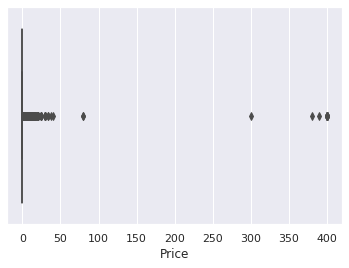

In [16]:
ax = sns.boxplot(x=df["Price"])

### Installs

Os 5 valores de instação mais Significativos: 
 1000000.0     1576
10000000.0    1252
100000.0      1150
10000.0       1009
5000000.0      752
Name: Installs, dtype: int64


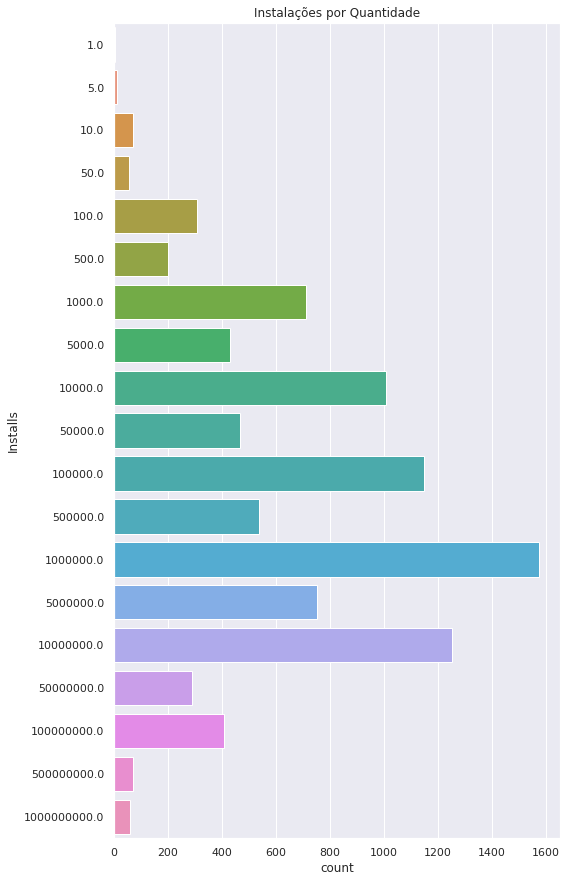

In [17]:
installs = df.Installs.value_counts()#.sort_index()
print("Os 5 valores de instação mais Significativos: \n",installs.head())
sns.set(style="darkgrid")
plt.figure(figsize=(8, 15))
sns.countplot(y='Installs',data=df )
plt.title("Instalações por Quantidade")
plt.show()

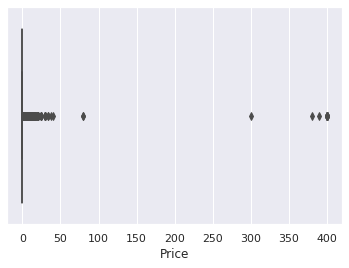

In [18]:
sns.boxplot(x=df['Price'])

Os 5 app com mais reviews: 
 2.0    83
3.0    78
5.0    74
4.0    74
1.0    67
Name: Reviews, dtype: int64 



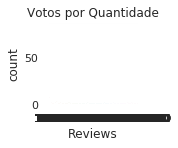

In [19]:
Reviews = df.Reviews.value_counts()#.sort_index()
print("Os 5 app com mais reviews: \n",Reviews.head(),"\n")
sns.set(style="darkgrid")
sns.catplot(x="Reviews",data = df,kind="count",height=2, aspect=1.2)
plt.title("Votos por Quantidade")
plt.grid(True)

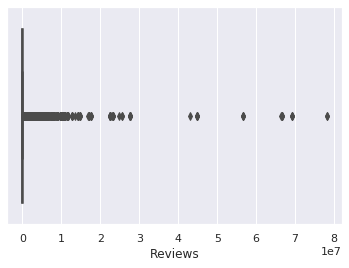

In [20]:
ax = sns.boxplot(x=df["Reviews"])

AxesSubplot(0.125,0.125;0.775x0.755)


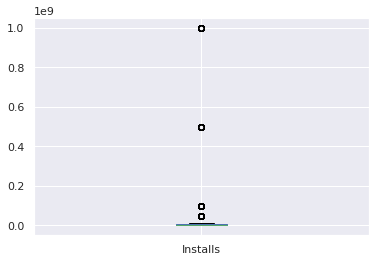

In [23]:
boxplot = df.boxplot(column=['Installs'])
print(boxplot)

In [25]:
z = np.abs(stats.zscore(df.Installs))
print(z)
threshold = 3
print(np.where(z > 3))

[0.19612598 0.19075679 0.14144793 ... 0.19623446 0.1962246  0.08666031]
(array([ 144,  322,  323,  325,  327,  328,  329,  334,  358,  365,  368,
        369,  370,  372,  373,  378,  390,  398,  407,  418,  438,  451,
        452,  454,  455,  461,  812, 1570, 1571, 1577, 1578, 1616, 1618,
       1621, 1638, 1645, 1666, 1667, 1675, 1758, 1785, 1788, 1801, 1802,
       1824, 1833, 1836, 1882, 2403, 2404, 2405, 2409, 2413, 2462, 2463,
       2469, 2470, 2667, 2712, 2743, 2976, 2986, 3082, 3091, 3093, 3094,
       3113, 3122, 3183, 3307, 3311, 3330, 3333, 3379, 3380, 3390, 3419,
       3422, 3426, 3431, 3512, 3534, 3550, 3557, 3582, 3585, 3601, 3611,
       3613, 3642, 3662, 3665, 3716, 3725, 3734, 3742, 3750, 3753, 3755,
       3774, 3780, 3789, 3816, 3838, 3840, 3849, 3883, 3885, 3892, 3940,
       3942, 3948, 3949, 3959, 3966, 3984, 3987, 3990, 3993, 4010, 4059,
       4071, 4192, 4366, 4476, 5086, 5269, 5477, 6720, 8625]),)


# Geral

            Rating   Reviews      Size  Installs     Price
Rating    1.000000  0.068133 -0.018903  0.051337 -0.021919
Reviews   0.068133  1.000000  0.036540  0.641605 -0.009824
Size     -0.018903  0.036540  1.000000  0.016522  0.018480
Installs  0.051337  0.641605  0.016522  1.000000 -0.011895
Price    -0.021919 -0.009824  0.018480 -0.011895  1.000000


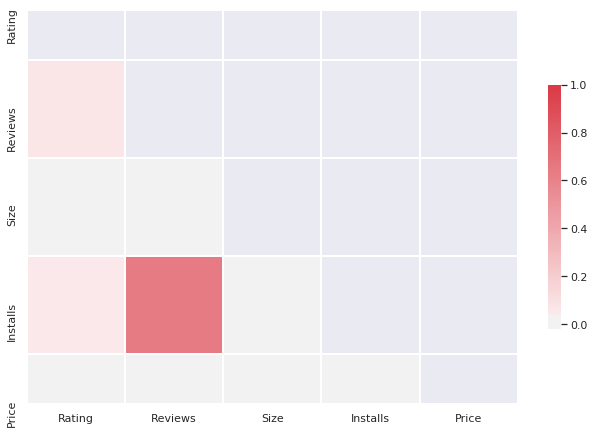

In [22]:
corr = df.corr()
print(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5})

In [33]:
x=pd.Installs
y=df.Installs
# Tranforma as variáveis em formato específico para a regressão linear
Xr = np.array(x).reshape(-1,1)
Yr = np.array(y).reshape(-1,1)

# Cria e alimenta o modelo
modelo = LinearRegression()
modelo.fit(Xr,Yr)

# Interceptação (b0)
print("Interceptação no eixoY em X=", modelo.intercept_)

# Inclinação (b1)
print("Coeficiênte de inclinação:", modelo.coef_)

Interceptação no eixoY em X= [-20208025.18272435]
Coeficiênte de inclinação: [[9093094.22178582]]


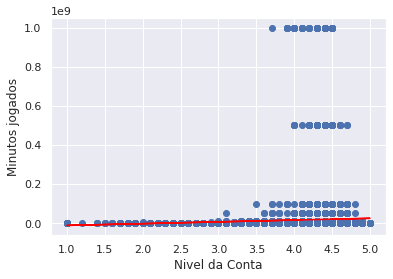

In [34]:
# Grafico
plt.xlabel('Nivel da Conta')
plt.ylabel('Minutos jogados')
plt.scatter(Xr,Yr)
plt.plot(Xr, modelo.predict(Xr),color = 'red')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f308b5e8650>,
 'caps': [<matplotlib.lines.Line2D at 0x7f308b5dc6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f308b773250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f308b5f26d0>],
 'fliers': [],
 'means': []}

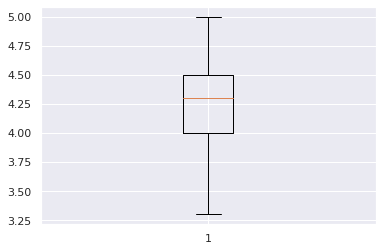

In [48]:
plt.boxplot(df.loc[:,'Rating'],showfliers = False)

# Fontes
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba